In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bangla-newspaper-dataset/data_v2/data_v2.json
/kaggle/input/bangla-newspaper-dataset/data/data.json


# New Section

In [3]:
import json
with open(file='../input/bangla-newspaper-dataset/data/data.json', encoding='utf-8') as file:
    data=json.load(file)


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer(num_words = 1000)   #maximum word limit 1000
tokenizer.fit_on_texts(data[6]['content']) # fit sentence


In [5]:
tokenizer.get_config()

{'num_words': 1000,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 1429,
 'word_counts': '{"\\u09af": 38, "\\u09c1": 19, "\\u0995": 37, "\\u09cd": 83, "\\u09a4": 43, "\\u09b0": 102, "\\u09be": 102, "\\u09b7": 9, "\\u099f": 12, "\\u09c7": 84, "\\u09ac": 54, "\\u099c": 21, "\\u09bf": 64, "\\u098f": 11, "\\u09b8": 35, "\\u09aa": 38, "\\u09a7": 11, "\\u09a8": 71, "\\u09b9": 14, "\\u0993": 12, "\\u09bc": 29, "\\u0999": 5, "\\u0997": 21, "\\u09ae": 38, "\\u09c0": 29, "\\u0989": 8, "\\u09a6": 30, "\\u0996": 5, "\\u0986": 16, "\\u09b2": 44, "\\u099b": 5, "\\u0982": 5, "\\u09b6": 10, "\\u09cb": 15, "\\u0964": 11, "\\u09c3": 2, "\\u099a": 14, "\\u0981": 3, "\\u09a3": 9, "\\u09a0": 2, "\\u09cc": 3, "\\u09ad": 9, "\\u0985": 2, "\\u09a5": 8, "\\u2018": 3, "\\u0987": 11, "\\u2019": 3, "\\u09c2": 3, "\\u099e": 2, "\\u09e8": 1, "\\u09ab": 1, "\\u0988": 1, "\\u09a1": 1}',
 'word_docs': '{"\\u09af": 38, "\\u

In [6]:
from numpy.lib.arraysetops import unique

category_list = []
filterData = []
garbageCategory = []
garbageContent = []
for i in range(len(data)):
    category = data[i]['category']
    category_list.append(category);
    if category == '-1' or category == '22221' or category == 'we-are' :
      garbageCategory.append(data[i])
      continue
    if data[i]['content'] == '-1' :
      garbageContent.append(data[i])
      continue
    filterData.append(data[i])

print(len(garbageCategory))
print(len(garbageCategory))
len(filterData)

3133
3133


434784

In [7]:

new_category_list = []

for i in range(len(filterData)):
    new_category_list.append(filterData[i]['category'])


unique_category_list = np.unique(np.array(new_category_list))
print(len(unique_category_list))
print(unique_category_list)


27
['AskEditor' 'bangladesh' 'bondhushava' 'chakri-bakri' 'demo-content'
 'diverse' 'durporobash' 'economy' 'education' 'entertainment' 'events'
 'international' 'kishoralo' 'life-style' 'mpaward1' 'nagorik-kantho'
 'northamerica' 'onnoalo' 'opinion' 'pachmisheli' 'protichinta' 'roshalo'
 'special-supplement' 'sports' 'tarunno' 'technology' 'trust']


In [8]:
from collections import Counter
Counter(new_category_list)

Counter({'bangladesh': 232495,
         'sports': 49010,
         'technology': 12113,
         'entertainment': 30464,
         'international': 30855,
         'economy': 17245,
         'life-style': 10852,
         'opinion': 15698,
         'education': 9721,
         'onnoalo': 2701,
         'pachmisheli': 3443,
         'AskEditor': 1,
         'roshalo': 2604,
         'durporobash': 7401,
         'events': 2,
         'kishoralo': 508,
         'special-supplement': 859,
         'demo-content': 2,
         'trust': 443,
         'northamerica': 6990,
         'protichinta': 170,
         'bondhushava': 990,
         'mpaward1': 17,
         'diverse': 2,
         'tarunno': 40,
         'chakri-bakri': 75,
         'nagorik-kantho': 83})

In [9]:

category_count = []
for each_category in unique_category_list:
    count_of_each_category = category_list.count(each_category)
    category_count.append((each_category,count_of_each_category))

category_count.sort();
category_count


[('AskEditor', 1),
 ('bangladesh', 232504),
 ('bondhushava', 990),
 ('chakri-bakri', 75),
 ('demo-content', 2),
 ('diverse', 2),
 ('durporobash', 7402),
 ('economy', 17245),
 ('education', 9721),
 ('entertainment', 30466),
 ('events', 2),
 ('international', 30856),
 ('kishoralo', 508),
 ('life-style', 10852),
 ('mpaward1', 17),
 ('nagorik-kantho', 83),
 ('northamerica', 6990),
 ('onnoalo', 2702),
 ('opinion', 15699),
 ('pachmisheli', 3443),
 ('protichinta', 170),
 ('roshalo', 2604),
 ('special-supplement', 859),
 ('sports', 49012),
 ('tarunno', 40),
 ('technology', 12116),
 ('trust', 443)]

In [10]:
selected_category_list = []

for i in category_count:
     if( i[1] > 2500 ):
         selected_category_list.append(i[0])

print(len(selected_category_list))
selected_category_list

14


['bangladesh',
 'durporobash',
 'economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'northamerica',
 'onnoalo',
 'opinion',
 'pachmisheli',
 'roshalo',
 'sports',
 'technology']

In [11]:

features = []
target = []


for i in filterData:
    if i['category'] in selected_category_list:
        if target.count(i['category']) < 4000:
          features.append(i['content'])
          target.append(i['category'])


print(len(features))
print(len(target))

# Check dataset
print("Category: --",target[-1])
print("Content: --",features[-1])


52748
52748
Category: -- pachmisheli
Content: -- ‘আমি তাঁকে দেখিনি কখনো। তিনিও দেখেননি আমাকে। কিন্তু মাসান্তে বৃত্তির টাকাটা ঠিক এসে পৌঁছে যায় আমার হাতে। আমি টের পাই, না দেখা সেই মানুষটি অদৃশ্যভাবে সব সময় আমার পাশেই আছেন। আমার আজন্ম কৃতজ্ঞতা সেই নৈতিক অভিভাবকের প্রতি।’মুঠোফোনের অন্য প্রান্ত থেকে সুমাইয়া আশরাফের কৃতজ্ঞতার অনুভূতি এভাবেই ভেসে আসে। এপ্রান্ত থেকে তাঁর মুখটা দেখা যায় না। কিন্তু চোখ বন্ধ করে তাকালে ঠিক দেখতে পাওয়া যায়, কৃতজ্ঞতাবোধের ঔজ্জ্বল্যে সব মুখ উজ্জ্বল হয়ে উঠেছে। কুষ্টিয়ায় অবস্থিত ইসলামী বিশ্ববিদ্যালয়ের স্নাতকোত্তর শিক্ষার্থী মেধাবী সুমাইয়া আশরাফ তাঁর বিভাগে প্রথম শ্রেণিতে প্রথম। নৈতিক অভিভাকত্বের মানবিক ধারণাটি তাঁর পিতার মৃত্যুতে ফ্যাকাশে হয়ে আসা স্বপ্নকে আবার রঙিন করে বাস্তবায়নের পথে এগিয়ে নিয়ে চলেছে।মাগুরার এক প্রত্যন্ত গ্রামের রাজিব হোসেনের গল্পটিও নাড়া দেয় আমাদের। ঢাকা বিশ্ববিদ্যালয়ের ভর্তি পরীক্ষায় সফলভাবে উত্তীর্ণ হয়েও বিশ্ববিদ্যালয়ে পড়ার স্বপ্ন যখন ধীরে ধীরে দুঃস্বপ্নে রূপান্তরিত হচ্ছিল, ঠিক তখনই একজন ‘মোরাল প্যারেন্ট’ (নৈতিক অভিভাবক) পাশে এসে দাঁড়ান। রাজিব এখ

In [12]:
# !pip install bnlp_toolkit
# !pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

# from bnlp import NLTKTokenizer
# from banglakit import lemmatizer as lem
# from banglakit.lemmatizer import BengaliLemmatizer

# import nltk
# from nltk.stem import WordNetLemmatizer

# nltk_tokenizer = NLTKTokenizer()
# lemmatizer = BengaliLemmatizer()

# # text = "আমার সোনার বাংলা, আমি তোমায় ভালবাসি।"
# # tokens = nltk_tokenizer.word_tokenize(text)
# # lemmatized_text = [lemmatizer.lemmatize(token) for token in tokens]


# # Tokenize the list of text.
# tokens_list = [nltk_tokenizer.word_tokenize(content) for content in features]

# # Apply lemmatization to each token in each list.
# lemmatized_tokens_list = []
# for tokens in tokens_list:
#     lemmatized_tokens = []
#     for token in tokens:
#         lemmatized_tokens.append(lemmatizer.lemmatize(token))
#     lemmatized_tokens_list.append(lemmatized_tokens)

# # Join the tokens back into a single string for each text in the list.
# # lemmatized_text_list = [' '.join(tokens) for tokens in lemmatized_tokens_list]



In [13]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

en_target=le.fit_transform(target)

set(en_target)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [14]:
from sklearn.model_selection import train_test_split


train_content, test_content, train_category, test_category = train_test_split(features, en_target, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)


print(len(train_content))
print(len(test_content))

42198
10550


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(train_content)
test_vectors = vectorizer.transform(test_content)

# Label encode the class labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_category)
test_labels = label_encoder.transform(test_category)


              precision    recall  f1-score   support

           0       0.69      0.89      0.78      3186
           1       0.67      0.70      0.68      3188
           2       0.82      0.73      0.77      3172
           3       0.95      0.78      0.86      3202
           4       0.80      0.73      0.76      3222
           5       0.70      0.75      0.73      3211
           6       0.77      0.61      0.68      3201
           7       0.73      0.73      0.73      3187
           8       0.73      0.61      0.66      2162
           9       0.71      0.74      0.72      3216
          10       0.42      0.54      0.47      2767
          11       0.61      0.56      0.58      2061
          12       0.83      0.74      0.79      3202
          13       0.71      0.80      0.75      3221

    accuracy                           0.72     42198
   macro avg       0.72      0.71      0.71     42198
weighted avg       0.73      0.72      0.72     42198

              precision  

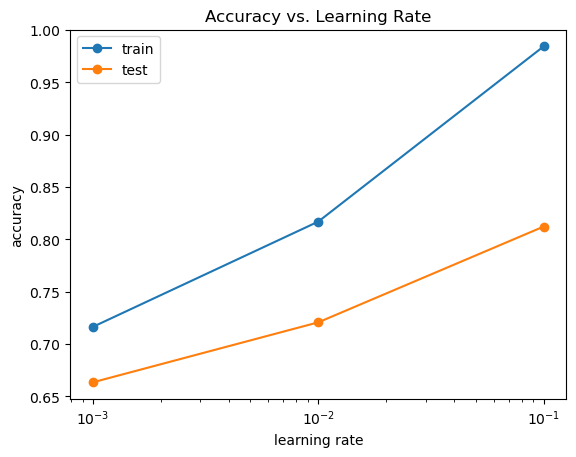

In [16]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# define range of learning rates to try
learning_rates = [0.001, 0.01, 0.1]

# initialize lists to store results
train_scores = []
test_scores = []

# # define the best hyperparameters
params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.1,
    'subsample': 1,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1, # L1 regularization
    'reg_lambda': 0.1 # L2 regularization
}

# loop over learning rates
for lr in learning_rates:
    # define the XGBoost classifier with updated learning rate
    params['learning_rate'] = lr
    xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=14, **params)
    
    # train the classifier
    xgb_clf.fit(train_vectors, train_labels)
    
    # make predictions on train and test data
    train_pred = xgb_clf.predict(train_vectors)
    test_pred = xgb_clf.predict(test_vectors)
    
    # calculate accuracy for train and test data
    train_acc = accuracy_score(train_labels, train_pred)
    test_acc = accuracy_score(test_labels, test_pred)
    
    # add scores to respective lists
    train_scores.append(train_acc)
    class_report = classification_report(train_labels, train_pred)
    print(class_report)
    test_scores.append(test_acc)
    class_report = classification_report(test_labels, test_pred)
    print(class_report)

# plot the results
plt.plot(learning_rates, train_scores, '-o', label='train')
plt.plot(learning_rates, test_scores, '-o', label='test')
plt.xscale('log')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.title('Accuracy vs. Learning Rate')
plt.savefig('XGBoost_accuracy1.png')
plt.legend()
plt.show()


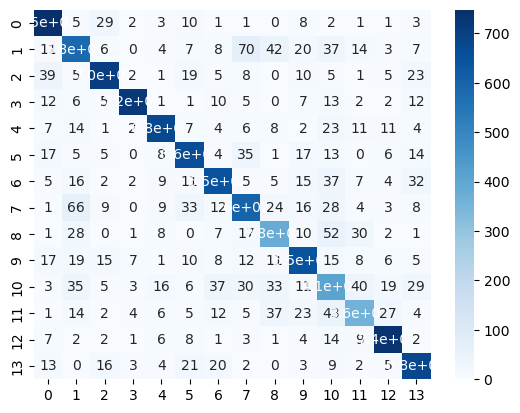

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix = confusion_matrix(test_labels, test_pred)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.savefig('XGBoost_confusion1.png')

In [151]:
index = 100 # index of content from test data list
predict_index = xgb_clf.predict(test_vectors[index]) #provide test data
print('Predicted Category label: ')
print(predict_index) #predicted category label
print('Actual Category label: ')
print(test_labels[index]) # actual test data category label
print(test_content[index]) #test data content

Predicted Category label: 
[2]
Actual Category label: 
2
বস্ত্র খাতের নতুন আরেক কোম্পানি ওয়া ওয়েল টেক্সটাইলসের প্রাথমিক গণপ্রস্তাব বা আইপিও আবেদন অনুমোদন করা হয়েছে। পুঁজিবাজার নিয়ন্ত্রক সংস্থা বাংলাদেশ সিকিউরিটিজ অ্যান্ড এক্সচেঞ্জ কমিশনের (বিএসইসি) গতকাল মঙ্গলবারের সভায় এই অনুমোদন দেওয়া হয়।এ ছাড়া বিএসইসির গতকালের সভায় প্রিমিয়ার ব্যাংকের ২০০ কোটি টাকার অরূপান্তরযোগ্য বন্ড ছাড়ার আবেদনও অনুমোদন করা হয়।বিএসইসি জানিয়েছে, ওয়া ওয়েল টেক্সটাইলস আইপিওতে দুই কোটি শেয়ার ছেড়ে বাজার থেকে ২০ কোটি টাকা মূলধন সংগ্রহ করবে। ১০ টাকা অভিহিত মূল্যে প্রতিটি শেয়ার বিক্রি করা হবে। বাজার থেকে সংগৃহীত টাকায় কোম্পানিটি মেশিনারিজ, জমি ক্রয়, নতুন কারখানা ভবন নির্মাণসহ অন্যান্য কর্মকাণ্ড পরিচালনা করবে। ২০১৩ সালের জুনে সমাপ্ত আর্থিক বছর শেষে কোম্পানিটির শেয়ারপ্রতি আয় বা ইপিএস দেখানো হয়েছে তিন টাকা ৬৬ পয়সা। আর শেয়ারপ্রতি প্রকৃত সম্পদমূল্য দেখানো হয়েছে ২৮ টাকা ২৫ পয়সা। কোম্পানিটির শেয়ারের ইস্যু ব্যবস্থাপকের দায়িত্বে রয়েছে আলফা ক্যাপিটাল ম্যানেজমেন্ট ও সিটিজেন সিকিউরিটিজ অ্যান্ড ইনভেস্টমেন্ট।বিএসইসির গতকালের সভায় প্রিমি